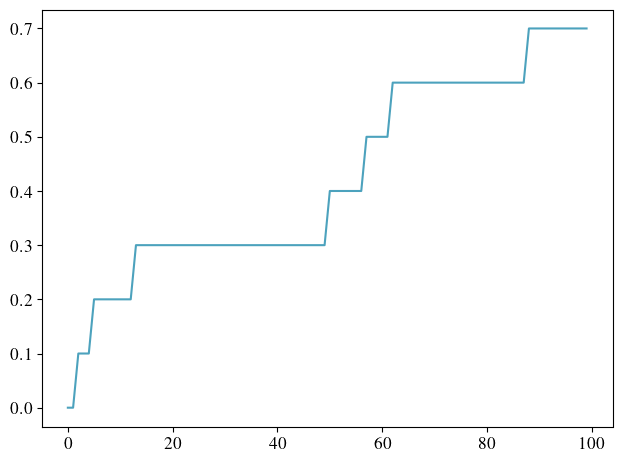

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sandpile import SandpileND

system = SandpileND(1, 10)
system(100)
plt.plot(range(100), system.average_slopes)